In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from keras.utils import plot_model
import matplotlib.pyplot as plt
%matplotlib inline 

Using TensorFlow backend.


In [2]:
metadata = {'IMG_ROWS' : 28,'IMG_COLS' : 28,'NUM_CLASSES' : 10,'TEST_SIZE' : 0.2,'RANDOM_STATE' : 2019}

options = {'NO_EPOCHS' : 10,'BATCH_SIZE' : 128}

In [3]:
import os

PATH="fashionmnist/"

print(os.listdir(PATH))

['fashion-mnist_test.csv', 'fashion-mnist_train.csv', 't10k-images-idx3-ubyte', 't10k-labels-idx1-ubyte', 'train-images-idx3-ubyte', 'train-labels-idx1-ubyte']


In [4]:
train_file = PATH+"fashion-mnist_train.csv"
test_file  = PATH+"fashion-mnist_test.csv"

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

In [5]:
print("Fashion MNIST train -  rows:",train_data.shape[0]," columns:", train_data.shape[1])
print("Fashion MNIST test -  rows:",test_data.shape[0]," columns:", test_data.shape[1])

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


In [6]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def get_classes_distribution(data):
    label_counts = data["label"].value_counts()
    total_samples = len(data)
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {}%".format(label, percent))

get_classes_distribution(train_data)

Ankle Boot          :   10.0%
Bag                 :   10.0%
Sneaker             :   10.0%
Shirt               :   10.0%
Sandal              :   10.0%
Coat                :   10.0%
Dress               :   10.0%
Pullover            :   10.0%
Trouser             :   10.0%
T-shirt/top         :   10.0%


In [7]:
get_classes_distribution(test_data)

Sneaker             :   10.0%
Shirt               :   10.0%
Sandal              :   10.0%
Coat                :   10.0%
Dress               :   10.0%
Pullover            :   10.0%
Ankle Boot          :   10.0%
Trouser             :   10.0%
Bag                 :   10.0%
T-shirt/top         :   10.0%


In [8]:
def sample_images_data(data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []
    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in labels.keys():
        # Get four samples for each category
        samples = data[data["label"] == k].head(4)
        # Append the samples to the samples list
        for j, s in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(metadata['IMG_ROWS'],metadata['IMG_COLS'])
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])
    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

In [9]:
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,8, figsize=(16,10))
    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img, cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()

Total number of sample images to plot:  40


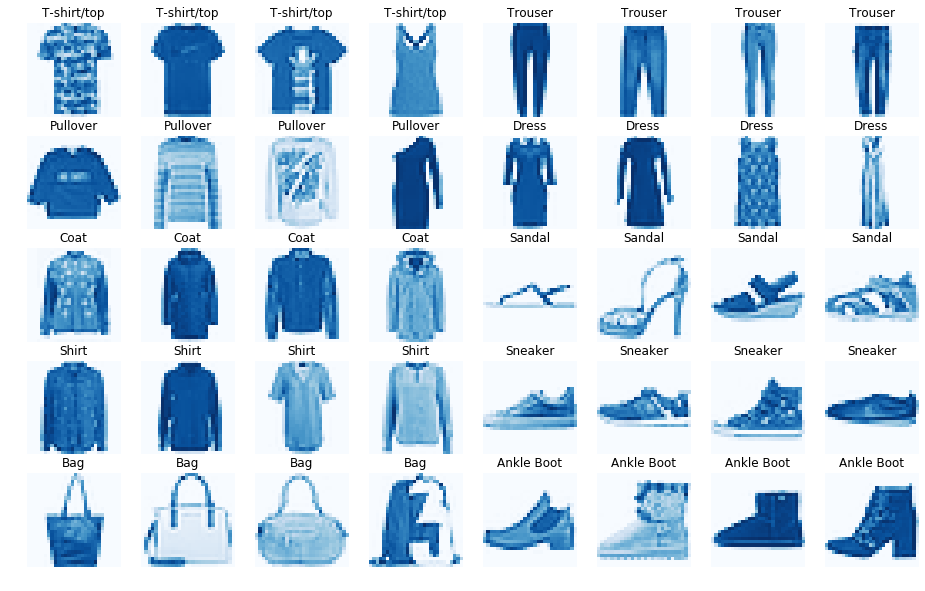

In [10]:
train_sample_images, train_sample_labels = sample_images_data(train_data)
plot_sample_images(train_sample_images,train_sample_labels)

Total number of sample images to plot:  40


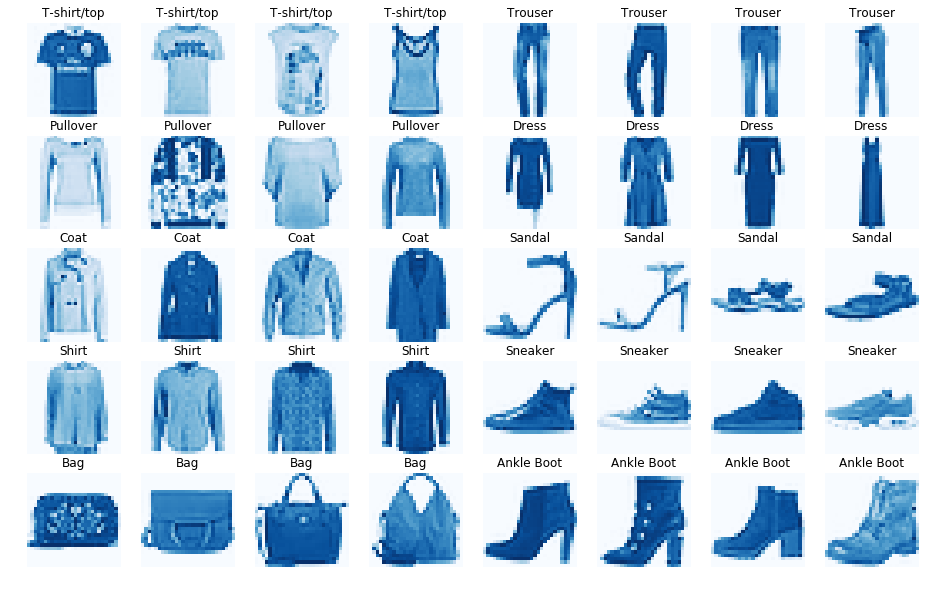

In [11]:
test_sample_images, test_sample_labels = sample_images_data(test_data)
plot_sample_images(test_sample_images,test_sample_labels)

In [12]:
# data preprocessing
def data_preprocessing(raw):
    out_y = keras.utils.to_categorical(raw.label, metadata['NUM_CLASSES'])
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, metadata['IMG_ROWS'], metadata['IMG_COLS'], 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

In [13]:
# prepare the data
X, y = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=metadata['TEST_SIZE'], random_state=metadata['RANDOM_STATE'])

In [15]:
print("Fashion MNIST train -  rows:",X_train.shape[0]," columns:", X_train.shape[1:4])
print("Fashion MNIST valid -  rows:",X_val.shape[0]," columns:", X_val.shape[1:4])
print("Fashion MNIST test -  rows:",X_test.shape[0]," columns:", X_test.shape[1:4])

Fashion MNIST train -  rows: 48000  columns: (28, 28, 1)
Fashion MNIST valid -  rows: 12000  columns: (28, 28, 1)
Fashion MNIST test -  rows: 10000  columns: (28, 28, 1)


In [16]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(metadata['IMG_ROWS'], metadata['IMG_COLS'], 1)))
model.add(MaxPooling2D((2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.3))
model.add(Dense(metadata['NUM_CLASSES'], activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [18]:
train_model = model.fit(X_train, y_train,
                  batch_size=options['BATCH_SIZE'],
                  epochs=options['NO_EPOCHS'],
                  verbose=1,
                  validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 73s 2ms/step - loss: 0.7546 - acc: 0.7165 - val_loss: 0.4985 - val_acc: 0.8098
Epoch 2/10
48000/48000 [==============================] - 72s 2ms/step - loss: 0.4829 - acc: 0.8205 - val_loss: 0.3825 - val_acc: 0.8617
Epoch 3/10
48000/48000 [==============================] - 66s 1ms/step - loss: 0.4095 - acc: 0.8488 - val_loss: 0.3430 - val_acc: 0.8741
Epoch 4/10
48000/48000 [==============================] - 62s 1ms/step - loss: 0.3696 - acc: 0.8650 - val_loss: 0.3144 - val_acc: 0.8826
Epoch 5/10
48000/48000 [==============================] - 56s 1ms/step - loss: 0.3447 - acc: 0.8746 - val_loss: 0.3058 - val_acc: 0.8881
Epoch 6/10
48000/48000 [==============================] - 58s 1ms/step - loss: 0.3224 - acc: 0.8819 - val_loss: 0.2848 - val_acc: 0.8938
Epoch 7/10
48000/48000 [==============================] - 57s 1ms/step - loss: 0.3057 - acc: 0.8881 - val_loss: 0.2696 - val_acc

In [19]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2300711002588272
Test accuracy: 0.9144


In [20]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)
#get the indices to be plotted
y_true = test_data.iloc[:, 0]

In [21]:
p = predicted_classes[:10000]
y = y_true[:10000]
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [22]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 9144
Incorrect predicted classes: 856


In [24]:
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(metadata['NUM_CLASSES'])]
print(classification_report(y_true, predicted_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.86      0.88      0.87      1000
    Class 1 (Trouser) :       0.99      0.99      0.99      1000
   Class 2 (Pullover) :       0.84      0.89      0.87      1000
      Class 3 (Dress) :       0.94      0.91      0.93      1000
       Class 4 (Coat) :       0.89      0.84      0.86      1000
     Class 5 (Sandal) :       0.99      0.98      0.98      1000
      Class 6 (Shirt) :       0.73      0.73      0.73      1000
    Class 7 (Sneaker) :       0.96      0.96      0.96      1000
        Class 8 (Bag) :       0.99      0.99      0.99      1000
 Class 9 (Ankle Boot) :       0.96      0.97      0.97      1000

              micro avg       0.91      0.91      0.91     10000
              macro avg       0.91      0.91      0.91     10000
           weighted avg       0.91      0.91      0.91     10000



In [27]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4,4, figsize=(15,15))

    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(X_test[indx].reshape(metadata['IMG_ROWS'],metadata['IMG_COLS']), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{}  Pred:{}".format(labels[y_true[indx]],labels[predicted_classes[indx]]))
    plt.show()    

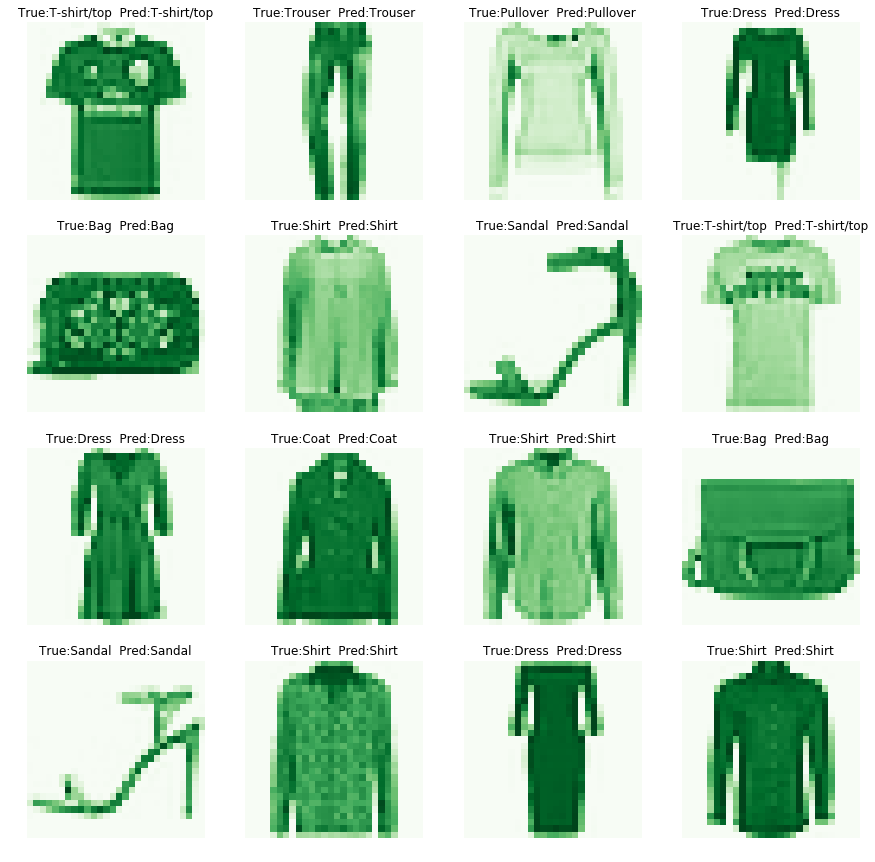

In [28]:
plot_images(correct, "Greens")

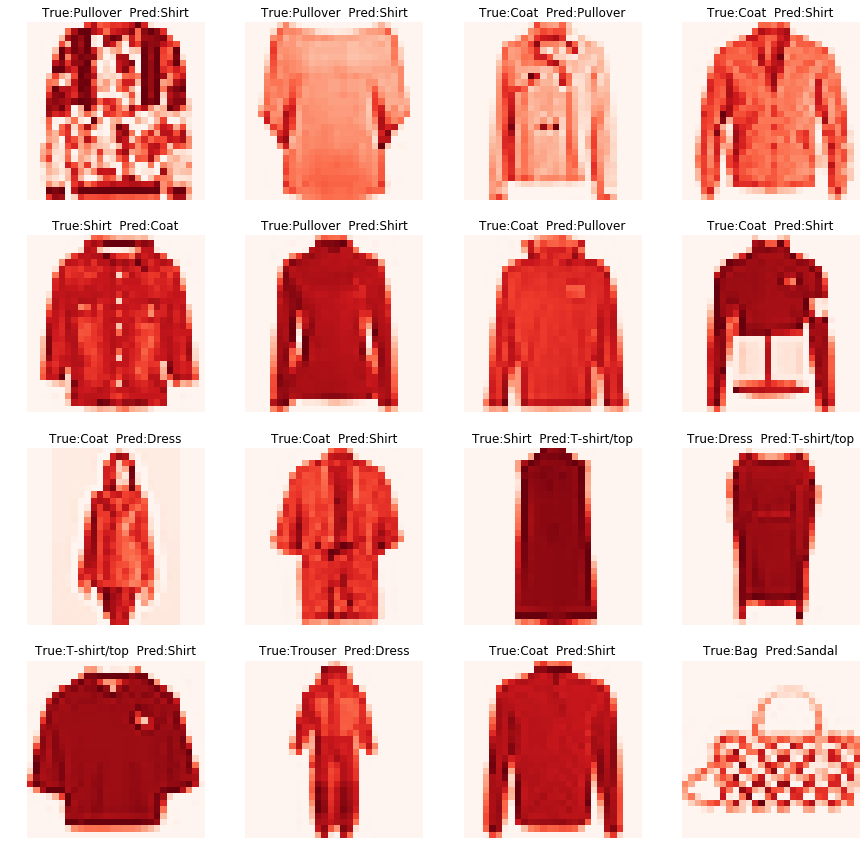

In [29]:
plot_images(incorrect, "Reds")